# RBM Recommender system, training and example

In [1]:
from src.eval import evaluate_rbm
from src.data_preprocessing import load_data, preprocess_data, load_movies
from src.rbm_model import RBM
from src.training import train_rbm
from src.plot_utils import plot_training_loss
from sklearn.model_selection import train_test_split
from src.utils import recommend, movie_from_tensor
import torch
import pandas as pd

## TRAINING
In this cell, the model is trained and reconstruction metrics are displayed.

Reconstruction Loss: 0.3876


Reconstruction Loss: 0.3063


Reconstruction Loss: 0.2775


Reconstruction Loss: 0.2601


Reconstruction Loss: 0.2465


Reconstruction Loss: 0.2372


Reconstruction Loss: 0.2289


Reconstruction Loss: 0.2217


Reconstruction Loss: 0.2154


Reconstruction Loss: 0.2093


Reconstruction Loss: 0.2029


Reconstruction Loss: 0.1989


Reconstruction Loss: 0.1927


Reconstruction Loss: 0.1880


Reconstruction Loss: 0.1834


Reconstruction Loss: 0.1787


Reconstruction Loss: 0.1741


Reconstruction Loss: 0.1702


Reconstruction Loss: 0.1661


Reconstruction Loss: 0.1618


Reconstruction Loss: 0.1573


Reconstruction Loss: 0.1538


Reconstruction Loss: 0.1501


Reconstruction Loss: 0.1485


Reconstruction Loss: 0.1439


Reconstruction Loss: 0.1425


Reconstruction Loss: 0.1398


Reconstruction Loss: 0.1370


Reconstruction Loss: 0.1331


Reconstruction Loss: 0.1316


Reconstruction Loss: 0.1302


Reconstruction Loss: 0.1278


Reconstruction Loss: 0.1251


Reconstruction Loss: 0.1241


Reconstruction Loss: 0.1216


Reconstruction Loss: 0.1200


Reconstruction Loss: 0.1189


Reconstruction Loss: 0.1193


Reconstruction Loss: 0.1158


Reconstruction Loss: 0.1147


Reconstruction Loss: 0.1139


Reconstruction Loss: 0.1111


Reconstruction Loss: 0.1104


Reconstruction Loss: 0.1093


Reconstruction Loss: 0.1078


Reconstruction Loss: 0.1085


Reconstruction Loss: 0.1067


Reconstruction Loss: 0.1054


Reconstruction Loss: 0.1032


Reconstruction Loss: 0.1050


Reconstruction Loss: 0.1031


Reconstruction Loss: 0.1016


Reconstruction Loss: 0.1031


Reconstruction Loss: 0.1007


Reconstruction Loss: 0.0999


Reconstruction Loss: 0.0990


Reconstruction Loss: 0.0994


Reconstruction Loss: 0.0987


Reconstruction Loss: 0.0966


Reconstruction Loss: 0.0966


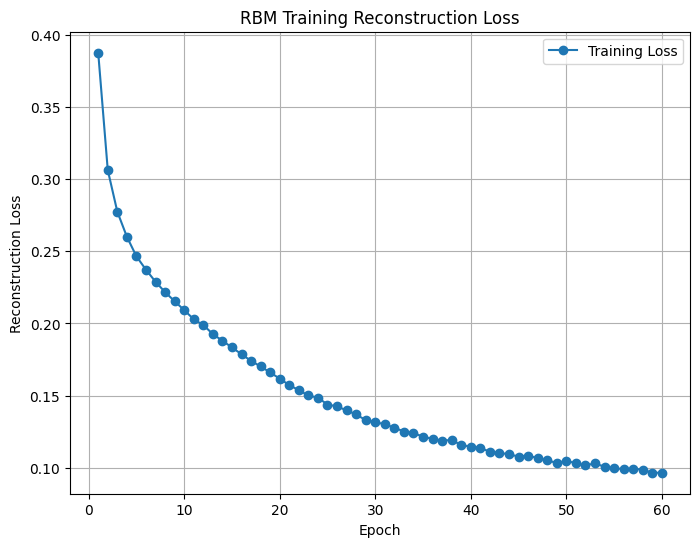

Validation loss: 0.07018917909251753
Validation accuracy: 92.98108198227104%


In [31]:
file_path = "data\\ml-100k\\u.data"
data = load_data(file_path)
interaction_matrix = preprocess_data(data)


interaction_tensor = torch.tensor(interaction_matrix.values, dtype=torch.float32)
train_data, test_data = train_test_split(interaction_tensor.numpy(), test_size=0.2, random_state=42)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_visible = interaction_tensor.shape[1]
num_hidden = 200
rbm = RBM(num_visible=num_visible, num_hidden=num_hidden, device=device)

losses = train_rbm(rbm, train_data, epochs=40, learning_rate=0.01, k=40, batch_size=32)

plot_training_loss(losses, title="RBM Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")
loss, acc = evaluate_rbm(rbm, test_data, device)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {acc*100}%")

## USAGE EXAMPLE
First, load the movies dataframe

In [3]:
movies = load_movies("data\\ml-100k\\u.item")

Now, we pick a random user.

In [27]:
import random
random_user = random.randint(1, len(test_data))
watched = test_data[random_user]
_,h = rbm.forward(watched)
probs, v = rbm.backward(h)


We print out all the movies user has watched.

In [28]:
movie_from_tensor(watched, movies)

'Toy Story (1995)' has the following genre:
['movie_id', 'Animation', "Children's", 'Comedy']
--------------------------------------------------
'Truth About Cats & Dogs, The (1996)' has the following genre:
['Comedy', 'Romance']
--------------------------------------------------
'Striptease (1996)' has the following genre:
['Comedy', 'Crime']
--------------------------------------------------
'Mirror Has Two Faces, The (1996)' has the following genre:
['Comedy', 'Romance']
--------------------------------------------------
'Jerry Maguire (1996)' has the following genre:
['Drama', 'Romance']
--------------------------------------------------
'Devil's Own, The (1997)' has the following genre:
['Action', 'Drama', 'Thriller', 'War']
--------------------------------------------------
'My Best Friend's Wedding (1997)' has the following genre:
['Comedy', 'Romance']
--------------------------------------------------
'Sabrina (1995)' has the following genre:
['Comedy', 'Romance']
-------------

Now, the idea is to reconstruct the users watched list, and keep the probabilities from reconstruction. We pick the largest n probabilities of movies the user has not watched as recommendation.

In [30]:
to_recommend = recommend(watched, probs, 5)
movie_from_tensor(to_recommend.cpu(), movies)

'English Patient, The (1996)' has the following genre:
['Drama', 'Romance', 'War']
--------------------------------------------------
'Absolute Power (1997)' has the following genre:
['Mystery', 'Thriller']
--------------------------------------------------
'Face/Off (1997)' has the following genre:
['Action', 'Sci-Fi', 'Thriller']
--------------------------------------------------
'Air Force One (1997)' has the following genre:
['Action', 'Thriller']
--------------------------------------------------
'In & Out (1997)' has the following genre:
['Comedy']
--------------------------------------------------
